### Trading Strategy based on short term momnetum and trailing stop loss

In [1]:
import yfinance as yf
data= yf.download("^NSEI",start="2024-01-01" , interval="1h")
data['smaSlow']=data['Close'].rolling(window=50).mean()
data['smaFast']=data['Close'].rolling(window=10).mean()
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,smaSlow,smaFast
Datetime,,,,,,,,
2024-01-01 09:15:00+05:30,21727.750000,21736.800781,21684.150391,21709.650391,21709.650391,0,NaN,NaN
2024-01-01 10:15:00+05:30,21709.599609,21742.500000,21695.300781,21741.250000,21741.250000,0,NaN,NaN
2024-01-01 11:15:00+05:30,21740.949219,21748.250000,21719.500000,21742.500000,21742.500000,0,NaN,NaN
2024-01-01 12:15:00+05:30,21741.150391,21750.500000,21711.300781,21737.949219,21737.949219,0,NaN,NaN
2024-01-01 13:15:00+05:30,21737.750000,21793.699219,21736.750000,21792.650391,21792.650391,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-04-25 11:15:00+05:30,22433.550781,22435.349609,22381.650391,22396.699219,22396.699219,0,22266.864961,22435.354883
2024-04-25 12:15:00+05:30,22397.800781,22462.900391,22380.400391,22452.150391,22452.150391,0,22267.930977,22437.059961
2024-04-25 13:15:00+05:30,22452.900391,22599.500000,22428.900391,22577.250000,22577.250000,0,22272.709961,22448.859961


In [2]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data.index, y=data['smaFast'], name='fastMA', line=dict(color='red')))
fig.add_trace(go.Scatter(x=data.index, y=data['smaSlow'], name='slowMA', line=dict(color='black')))
# Update layout
fig.update_layout(title='Moving Averages and Exponential Moving Average',
                  xaxis_title='Date',
                  yaxis_title='Price')

# # Show the plot
# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'blue'},
              'name': 'Close',
              'type': 'scatter',
              'x': array([datetime.datetime(2024, 1, 1, 9, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 1, 1, 10, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 1, 1, 11, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          ...,
                          datetime.datetime(2024, 4, 25, 13, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 4, 25, 14, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 4, 25, 15, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)],
                         dtype=object),
              'y': array([21709.65039062, 21741.25      , 21742.5       , ..., 22577.25      ,
                          22570.25      , 22570.34960938])},
             {'line': {'color': 'red'},
              'name': 'fastMA',
              'type': 'scatter',
              'x': array([datetime.datetime(2024, 1, 1, 9, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 1, 1, 10, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 1, 1, 11, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          ...,
                          datetime.datetime(2024, 4, 25, 13, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 4, 25, 14, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 4, 25, 15, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)],
                         dtype=object),
              'y': array([           nan,            nan,            nan, ..., 22448.85996094,
                          22459.89003906, 22472.03496094])},
             {'line': {'color': 'black'},
              'name': 'slowMA',
              'type': 'scatter',
              'x': array([datetime.datetime(2024, 1, 1, 9, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 1, 1, 10, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 1, 1, 11, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          ...,
                          datetime.datetime(2024, 4, 25, 13, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 4, 25, 14, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 4, 25, 15, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)],
                         dtype=object),
              'y': array([           nan,            nan,            nan, ..., 22272.70996094,
                          22277.43195313, 22283.43894531])}],
    'layout': {'template': '...',
               'title': {'text': 'Moving Averages and Exponential Moving Average'},
               'xaxis': {'title': {'text': 'Date'}},
               'yaxis': {'title': {'text': 'Price'}}}
})

### SIMPLE MOMENTUM STRATEGY

In [3]:
df=data[['Open','High','Low','Close','Volume']]
df['price'] = df['Open'].shift(-1)
df

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\3409120072.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,price
Datetime,,,,,,
2024-01-01 09:15:00+05:30,21727.750000,21736.800781,21684.150391,21709.650391,0,21709.599609
2024-01-01 10:15:00+05:30,21709.599609,21742.500000,21695.300781,21741.250000,0,21740.949219
2024-01-01 11:15:00+05:30,21740.949219,21748.250000,21719.500000,21742.500000,0,21741.150391
2024-01-01 12:15:00+05:30,21741.150391,21750.500000,21711.300781,21737.949219,0,21737.750000
2024-01-01 13:15:00+05:30,21737.750000,21793.699219,21736.750000,21792.650391,0,21792.199219
...,...,...,...,...,...,...
2024-04-25 11:15:00+05:30,22433.550781,22435.349609,22381.650391,22396.699219,0,22397.800781
2024-04-25 12:15:00+05:30,22397.800781,22462.900391,22380.400391,22452.150391,0,22452.900391
2024-04-25 13:15:00+05:30,22452.900391,22599.500000,22428.900391,22577.250000,0,22576.400391


In [4]:
df['ret']=df.Close.pct_change()
df

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\814087562.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,price,ret
Datetime,,,,,,,
2024-01-01 09:15:00+05:30,21727.750000,21736.800781,21684.150391,21709.650391,0,21709.599609,NaN
2024-01-01 10:15:00+05:30,21709.599609,21742.500000,21695.300781,21741.250000,0,21740.949219,0.001456
2024-01-01 11:15:00+05:30,21740.949219,21748.250000,21719.500000,21742.500000,0,21741.150391,0.000057
2024-01-01 12:15:00+05:30,21741.150391,21750.500000,21711.300781,21737.949219,0,21737.750000,-0.000209
2024-01-01 13:15:00+05:30,21737.750000,21793.699219,21736.750000,21792.650391,0,21792.199219,0.002516
...,...,...,...,...,...,...,...
2024-04-25 11:15:00+05:30,22433.550781,22435.349609,22381.650391,22396.699219,0,22397.800781,-0.001625
2024-04-25 12:15:00+05:30,22397.800781,22462.900391,22380.400391,22452.150391,0,22452.900391,0.002476
2024-04-25 13:15:00+05:30,22452.900391,22599.500000,22428.900391,22577.250000,0,22576.400391,0.005572


In [5]:
df.dropna(inplace=True)
df['ret'].mean()

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\958575837.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



7.592727965578927e-05

In [6]:
df.tail(10)

,Open,High,Low,Close,Volume,price,ret
Datetime,,,,,,,
2024-04-24 12:15:00+05:30,22460.099609,22463.300781,22432.949219,22448.900391,0,22447.750000,-0.000492
2024-04-24 13:15:00+05:30,22447.750000,22458.949219,22437.849609,22449.400391,0,22449.599609,0.000022
2024-04-24 14:15:00+05:30,22449.599609,22453.150391,22384.800781,22401.750000,0,22401.650391,-0.002123
2024-04-24 15:15:00+05:30,22401.650391,22414.949219,22397.099609,22412.199219,0,22325.349609,0.000466
2024-04-25 09:15:00+05:30,22325.349609,22457.949219,22308.300781,22457.150391,0,22454.199219,0.002006
2024-04-25 10:15:00+05:30,22454.199219,22474.599609,22339.750000,22433.150391,0,22433.550781,-0.001069
2024-04-25 11:15:00+05:30,22433.550781,22435.349609,22381.650391,22396.699219,0,22397.800781,-0.001625
2024-04-25 12:15:00+05:30,22397.800781,22462.900391,22380.400391,22452.150391,0,22452.900391,0.002476
2024-04-25 13:15:00+05:30,22452.900391,22599.500000,22428.900391,22577.250000,0,22576.400391,0.005572


In [90]:
profits = []
in_position = False

for index,row in df.iterrows():
    if not in_position and row.ret >0.002:
        buyprice = row.price
        in_position=True 
        trailing_stop = buyprice*0.98
    if in_position:
        #ammend stoploss if closing price is moving upward
        if row.Close * 0.98 >= trailing_stop:
            trailing_stop = row.Close*0.98
        if row.Close <= trailing_stop:
            sellprice = row.price
            profit = (sellprice-buyprice)/buyprice #commission is not excluded
            profits.append(profit)
            in_position =False

In [91]:
profits

[-0.0053826062687641054,
 0.006032307824336432,
 0.01447121844847782,
 0.008472025776820514]

<Axes: >

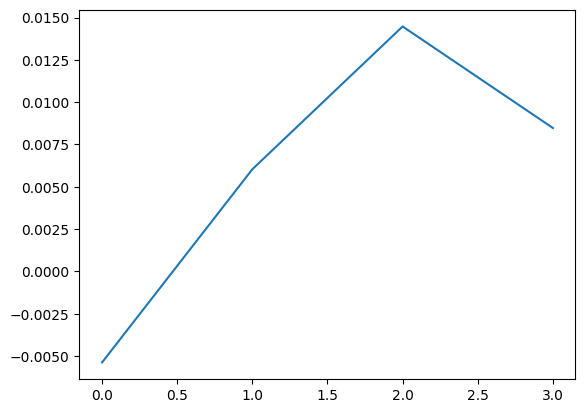

In [93]:
import pandas as pd
pd.Series(profits).plot()

<Axes: >

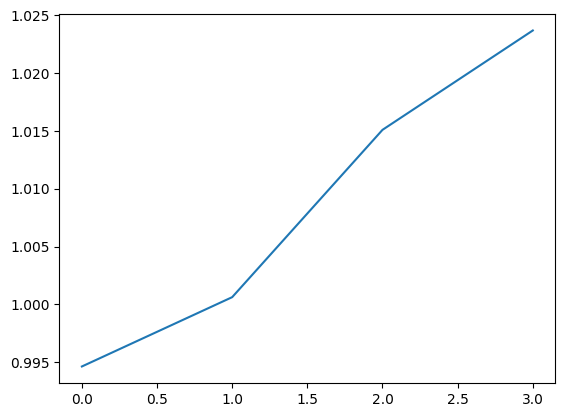

In [94]:
#Cummulative return
(pd.Series(profits)+1).cumprod().plot()

### Trying out the Strategy on a bigger dataset -https://www.kaggle.com/datasets/debashis74017/nifty-50-minute-data/code

In [95]:
df=pd.read_csv(r'D:\backtest_ursell\NIFTY 50 - Minute data.csv')

In [96]:
df.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


In [97]:
df.set_index(df.date,inplace=True)
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [98]:
df.index=pd.to_datetime(df.index)

df=df[['open','high','low','close']]

df.rename(columns={df.columns[0]:"Open",df.columns[1]:"High",df.columns[2]:"Low",df.columns[3]:"Close"},inplace=True)

In [99]:
df['price'] = df['Open'].shift(-1)
df['ret']=df.Close.pct_change()
df.dropna(inplace=True)
df

,Open,High,Low,Close,price,ret
date,,,,,,
2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,8287.40,-0.000476
2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,8294.25,0.000694
2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,8300.60,0.000814
2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,8300.50,0.000066
2015-01-09 09:20:00,8300.50,8303.00,8298.60,8300.00,8300.65,-0.000145
...,...,...,...,...,...,...
2024-01-25 15:24:00,21364.90,21380.35,21363.20,21378.20,21376.55,0.000482
2024-01-25 15:25:00,21376.55,21378.90,21372.75,21377.95,21376.55,-0.000012
2024-01-25 15:26:00,21376.55,21386.10,21375.80,21384.20,21384.75,0.000292


## Function

In [100]:
def trail(df,entry,dist):
    profits = []
    in_position = False

    for index,row in df.iterrows():
        if not in_position and row.ret > entry:
            buyprice = row.price
            in_position=True 
            trailing_stop = buyprice * dist
        if in_position:
            #ammend stoploss if closing price is moving upward
            if row.Close * dist >= trailing_stop:
                trailing_stop = row.Close * dist
            if row.Close <= trailing_stop:
                sellprice = row.price
                profit = (sellprice-buyprice)/buyprice - 0.002
                profits.append(profit)
                in_position =False
    return (pd.Series(profits)+1).cumprod()

In [101]:
trail(df,.002,.98)

0      1.065490
1      1.043867
2      1.066622
3      1.058997
4      1.073951
         ...   
295    1.903570
296    1.862369
297    2.074836
298    2.128690
299    2.112263
Length: 300, dtype: float64

In [32]:
df.reset_index(inplace=True)
df

,index,Datetime,Open,High,Low,Close,Volume,price,ret
0,0,2024-01-01 10:15:00+05:30,21709.599609,21742.500000,21695.300781,21741.250000,0,21740.949219,0.001456
1,1,2024-01-01 11:15:00+05:30,21740.949219,21748.250000,21719.500000,21742.500000,0,21741.150391,0.000057
2,2,2024-01-01 12:15:00+05:30,21741.150391,21750.500000,21711.300781,21737.949219,0,21737.750000,-0.000209
3,3,2024-01-01 13:15:00+05:30,21737.750000,21793.699219,21736.750000,21792.650391,0,21792.199219,0.002516
4,4,2024-01-01 14:15:00+05:30,21792.199219,21832.400391,21719.900391,21725.300781,0,21725.949219,-0.003090
...,...,...,...,...,...,...,...,...,...
532,532,2024-04-25 10:15:00+05:30,22454.199219,22474.599609,22339.750000,22433.150391,0,22433.550781,-0.001069
533,533,2024-04-25 11:15:00+05:30,22433.550781,22435.349609,22381.650391,22396.699219,0,22397.800781,-0.001625
534,534,2024-04-25 12:15:00+05:30,22397.800781,22462.900391,22380.400391,22452.150391,0,22452.900391,0.002476
535,535,2024-04-25 13:15:00+05:30,22452.900391,22599.500000,22428.900391,22577.250000,0,22576.400391,0.005572


### To get markers for buy and sell Action- create a dataframe

In [38]:
import pandas as pd

def trail(df,entry,dist):
    trades_df = pd.DataFrame(columns=['Date', 'Price', 'Action'])
    cumulative_profit = 0
    winning_trades = 0
    total_trades = 0
    profits = []
    in_position = False

    for index,row in df.iterrows():
        if not in_position and row.ret > entry:
            buyprice = row.price
            in_position=True 
            trailing_stop = buyprice * dist
            trades_df = trades_df.append({'Date': row.Datetime,'Price': buyprice, 'Action': 'Buy'}, ignore_index=True)
        if in_position:
            #ammend stoploss if closing price is moving upward
            if row.Close * dist >= trailing_stop:
                trailing_stop = row.Close * dist
            if row.Close <= trailing_stop:
                sellprice = row.price
                profit = (sellprice-buyprice)/buyprice 
                profits.append(profit)
                in_position =False
                cumulative_profit += profit
                total_trades += 1
                if profit > 0:
                    winning_trades += 1
                trades_df = trades_df.append({'Date': row.Datetime,'Price': sellprice, 'Action': 'Sell'}, ignore_index=True)
    return trades_df
trail(df,.001,.98)

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:30: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:30: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,Date,Price,Action
0,2024-01-01 10:15:00+05:30,21740.949219,Buy
1,2024-01-17 11:15:00+05:30,21674.900391,Sell
2,2024-01-17 13:15:00+05:30,21657.900391,Buy
3,2024-02-12 12:15:00+05:30,21613.849609,Sell
4,2024-02-12 13:15:00+05:30,21687.849609,Buy
5,2024-03-13 13:15:00+05:30,22001.699219,Sell
6,2024-03-14 09:15:00+05:30,22011.150391,Buy
7,2024-04-15 14:15:00+05:30,22271.500000,Sell
8,2024-04-16 13:15:00+05:30,22142.650391,Buy
